### Preparación de Datos

La preparación de datos o limpieza de datos es un proceso que permite analizar la información para detectar y corregir los errores que determinado dataset pueda presentar (E.g. datos nulos). Estos errores se pueden clasificar en:
- **Tipos de datos**: representación númerica de un datos que tiene un significado categórico (E.g. números que reprentan un estado civil o un color).
- **Datos categóricos**: problemas de escritura en los datos de tipo categórico que pueden causar conflictos (E.g. mismo valor en el campo pero diferencias entre mayúsculas y minúsculas => RoJO y rojo).
- **Uniformidad de los datos**: mismo formato para todos los valores de un campo (E.g. fechas con un único formato).
- **Completitud de los datos**: presencia de datos nulos, información faltante.

Esta limpieza de datos es importante para poder tener datasets de buena calidad de forma que los resultados de los procesos que se quieran realizar sobre los datos sean acertados.

Para este ejemplo vamos a utilizar el siguiente dataset: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings. Este dataset, llamado **Video Game Sales with Ratings**, contiene información de ventas de un listado de videojuegos incluyendo los nombres de los videojuegos, la plataforma, el año de publicación, el género, el editor, el desarrollador, sus rankings entre otros. Si se desea hacer un análisis de datos sobre este dataset es importante primero realizar una limpieza de datos.

**Nota de interés**: este dataset que veremos en este ejemplo es un dataset construído utilizando Web Scraping, una técnica de obtención de datos, a partir de un sitio web. Este tema lo veremos en próximas unidades.

#### Pasos importantes para realizar la limpieza de los datos:
1. Conocer toda la información general del dataset. Para este ejemplo, como ya se mencionó, se utilizará el dataset **Video Game Sales with Ratings** que contiene los datos de ventas de un listado de más de 10K videojuegos, todos ellos con más de 100K copias vendidas. Las columnas que contiene este dataset son las siguientes:
   - **Name**: nombre del videojuego. Tipo categórico.
   - **Platorm**: nombre de la plataforma destino del videojuego. Tipo categórico.
   - **Year_of_Release**: año de publicación del videojuego. Tipo numérico.
   - **Genre**: género del videojuego. Tipo categórico.
   - **Publisher**: editor del videojuego. Tipo categórico.
   - **NA_Sales**: número de ventas en Norte América. Tipo numérico.
   - **EU_Sales**: número de ventas en Europa. Tipo numérico.
   - **JP_Sales**: número de ventas en Japón. Tipo numérico.
   - **Other_Sales**: número de ventas en otras regiones: Tipo numérico.
   - **Global_Sales**: número de ventas a nivel global: Tipo numérico.
   - **Critic_Score**: puntaje compilado de las críticas al videoojuego en Metacritic. Tipo numérico.
   - **Critic_Count**: número de críticas realizadas al videojuego en Critic_Score. Tipo numérico.
   - **User_Score**: puntaje dado por los usuarios de Metacritic al videojuego. Tipo numérico.
   - **User_Count**: numéro de usuarios que dieron su puntaje al videojuego en User_Score. Tipo numérico.
   - **Devloper**: desarrollador del videojuego. Tipo categórico.
   - **Rating**: Rating ESRB. Tipo categórico.

2. Realizar un análisis exploratorio de los datos para identificar los problemas o errores presentes en el dataset y pensar en las posibles estrategias para solucionar dichos inconvenientes.
3. Aplicar las estrategias de limpieza de datos.


### Una vez conocida la información general del dataset ¡podemos comenzar con el análisis exploratorio!

Para realizar el análisis exploratorio y la posterior limpieza de los datos vamos a utilizar el lenguaje de programación Python, específicamente su módulo **pandas**. Para comenzar debemos importar dicho módulo.

In [1]:
# Importar el o los módulos necesarios para analizar y limpiar los datos.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

A continuación debemos importar el dataset con el que vamos a trabajar, en este caso el dataset **Video Game Sales with Ratings**. Para importarlo debemos descargar el archivo *.csv*, ubicado en del siguiente link https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings. A continuación debemos ubicarlo en el mismo directorio donde se encuentra ubicado este *notebook*. Por último usaremos pandas para importar el dataset y asignarlo a una variable.

In [3]:
# Para importar el dataset y guardarlo en una variable usamos el método read_csv().
original_df = pd.read_csv('./Data/Video_Games_Sales_as_at_22_Dec_2016.csv')

Si en el dataset que importamos no están especificados los nombres de las columnas podemos usar el parámetro **header=None** en el método de pandas *read_csv()*, esto con el fin de evitar que el primer registro de dataset sea tratado como las columnas del mismo (E.g. esto puede pasar para archivos de extensión .data). Con el dataset guardado en la variable *original_df* podemos visualizar los datos.

In [8]:
# Paa visualizar los datos usamos el método head(). Esta función, por defecto, nos mostrará los datos de los primeros
# cinco registros del dataset. Si queremos ver más registros debemos indicarle al método el número de registros que
# queremos visualizar. E.g. head(8).
original_df.tail(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16699,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.0,0.01,67.0,9.0,tbd,NaN,Planet Interactive,E
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.0,0.01,53.0,4.0,tbd,NaN,Taito Corporation,E
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01,48.0,10.0,tbd,NaN,Interchannel-Holon,E
16703,The Longest 5 Minutes,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16704,Mezase!! Tsuri Master DS,DS,2009.0,Sports,Hudson Soft,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16705,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+
16707,Strawberry Nauts,PSV,2016.0,Adventure,Unknown,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16708,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01,NaN,NaN,tbd,NaN,Big John Games,E


Con esta primera visualización podemos notar que las columnas están correctamente nombradas. En el dado caso en que las columnas no tengan los nombres apropiados, estos nombres se pueden asignar usando el atributo *columns*. E.g. *df.columns = [...]*, donde en el arreglo se especifican los nombres por medio de strings (texto) usando comillas dobles ("") o comillas simples ('').

Ahora, si queremos en algún momento visualizar los últimos elementos del dataset podemos usar el método *tail()*. También podemos visualizar un grupo aleatorio de registros usando el método *sample()* al que le podemos pasar como parámetro un valor *n* que define el tamaño de dicha grupo o muestra aleatoria.

Lo siguiente que podemos hacer es visualizar la información de cada una de las columnas.

In [9]:
# Usamos el atributo shape para observar el tamaño del dataset.
original_df.shape

(16719, 16)

Esto nos está mostrando que el dataset cuenta con 16719 registros (filas) y 16 columnas. Usando el método *info()* podemos obtener la información de las columnas.

In [10]:
# Usamos el método info() para obtener información de las columnas del dataset.
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Al verificar esta información podemos comenzar a detectar los primeros problemas. Anteriormente habíamos dicho que el número total de registros era de 16719, pero aquí vemos que para algunas columnas los registros no están completos. Eso quiere decir que en cada una de esas columnas hay valores nulos. También es raro que la columna *User_Score* sea de tipo *object*, pues debería tener un tipo numérico por representar un puntaje.

Otra forma de obtener información valiosa de los datos de cada columna es utilizar el método *describe()*. Este método nos provee información estadística de los datos de cada columna como la media, la desviación estándar, cuartiles, etc, mismos que nos pueden mostrar el comportamiento de sus respectivos datos. Se debe tener en cuenta que este método actúa por defecto sobre las columnas de tipo númerico.

In [13]:
# Usamos el método descibre para obtener datos estadísticos de las columnas de tipo numérico.
original_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


El método *describe()* nos está mostrando información interesante. Por ejemplo en la columna *User_Count* podemos ver los valores 10.00, 24.00 y 81.00 para los cuartiles 25%, 50% y 75% respectivamente. Pero también nos está mostrando un valor de 10665.00 para el valor máximo, lo que parece indicar un valor atípico.

Para verificar este comportamiento podemos utilizar una gráfica de cajas y bigotes sobre la columna *User_Count*.

<class 'pandas.core.series.Series'>
float64


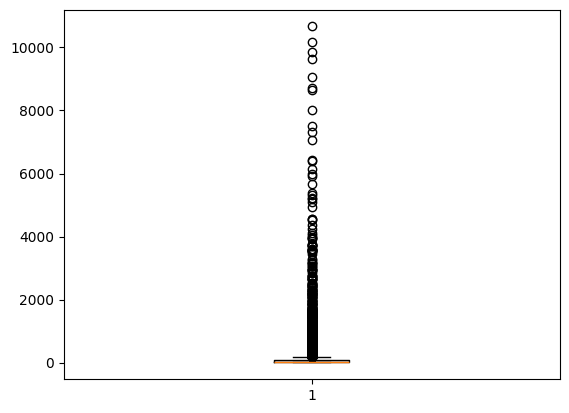

In [16]:
# Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
# para que al dibujar la gráfica de cajas y bigotes no nos dé ningún problema.
user_count = original_df['User_Count'].dropna()

print(type(user_count))
print(user_count.dtype)

# Dibujamos la gráfica de cajas y bigotes.
plt.boxplot([user_count])
plt.show()

La gráfica nos muestra que efectivamente hay valores atípicos bastante importantes denominados outliers. Estos outliers pueden llegar a afectar mucho la estadística por lo que en algún punto toca reemplazarlos.

Por otro lado, también es posible ver información de las columnas de tipo categórico utilizando el método *describe()*.

In [20]:
# Si usamos el método describe() con el parámetros include='0' podemos ver información adicional de las columnas
# que tienen valores categóricos.
original_df.describe(include='O').T

,count,unique,top,freq
Name,16717,11562,Need for Speed: Most Wanted,12
Platform,16719,31,PS2,2161
Genre,16717,12,Action,3370
Publisher,16665,581,Electronic Arts,1356
User_Score,10015,96,tbd,2425
Developer,10096,1696,Ubisoft,204
Rating,9950,8,E,3991


Aquí obtenemos información como el conteo total de registros para cada columna (no se cuentan los valores nulos), el conteo de valores únicos para cada columna, el valor que más aparece para cada columna, etc. Viendo la tabla podemos identificar otro problema: la columna *User_Score* posee valores no númericos como *tbd*. Esto es lo que está convirtiendo la columna en tipo *object*.

Algo interesante a destacar es que si se hace una investigación sobre el **Rating ESRB**, este sólo contiene seis categorías (E, E10+, T, M, AO y RP) y aquí se nos está mostrando que hay ocho valores únicos para la columna *Rating*. Verifiquemos cuáles son dichos valores únicos.

In [21]:
# Usamos el método unique() sobre la columna deseada para verificar cúales son los valores únicos.
original_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

En este punto podemos observar que además de las categorías antes mencionadas hay una categoría adicional denominada *K-A*. Resulta que esta categoría fue reemplazada en 1998 por la categoría *E*, es decir *K-A* ya no está vigente.

#### Resultados del análisis exploratorio

Los siguientes son los resultados que pudimos obtener a partir del análisis exploratorio que realizamos sobre el dataset:
* Presencia de valores nulos en varias columnas.
* La columna *User_Score* contiene elementos string que la transforman en un tipo object (categórico). Esta columna debería ser de tipo numérico.
* Presencia de valores atípicos (E.g. columna *User_Count*).
* La columna *Rating* contiene un valor que ya no se encuentra vigente en el Rating ESRB.


### Con los anteriores resultados ya podemos comenzar a hacer la limpieza de datos

#### Valores nulos
Comencemos tratando de solucionar el tema de los valores nulos. Muchas veces al querer solucionar este problema, la primera acción que nos sentimos tentados de realizar es borrar todos aquellos registros que tengan valores nulos y no siempre esa es la mejor solución. Primero se debería tratar de hacer un análisis de esos valores. Echemos un vistazo al número de valores nulos que tenemos por columna.

In [23]:
# Verificamos el total de valores nulos en cada columna.
original_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Viendo estos datos hay varias cosas a tener en cuenta:
1. Existen dos registros cuyo nombre del videojuego no existen. No tiene sentido conservarlos pues no sabemos de que videjuegos se tratan. Esos dos registros se pueden borrar.
2. El año de publicación y el nombre de los editores son dos temas complejos que podríamos dejar para el final de esta parte de los nulos.
3. Para las columnas *Critic_Score*, *Critic_Count* podemos usar estrategias para reemplazar los valores nulos, por ejemplo reemplazar por la media, por la moda o por la mediana.
4. Para la columna *User_Score* debemos atender primero el problema del error de tipo.
5. Para la columna *User_Count* podemos aplicar las mismas estrategias del punto 3, pero antes debemos ver el problema de los datos atípicos.
6. Para el caso del nombre del desarrollador, por ser una columna cuyos valores son categóricos, se podría pensar en reemplazar por la moda, pero esto no sería tan apropiado como pensamos.
7. Para el caso del rating podríamos reemplazar por la moda, pero antes debemos corregir el tema del valor que ya no está vigente y reemplazarlo.

Comencemos pues eliminando los dos registros que no tienen un valor para el nombre del videojuego.

In [25]:
# Creamos una copia del dataframe original usando el método copy(). Esto lo hacemos porque más adelante podríamos necesitar
# los datos originales para realizar alguna tarea.
df_toclean = original_df.copy() # Limpiaremos los datos usando el dataframe df_toclean.

# Utilizamos el método notnull() que nos permite hacer un filtro de todos aquellos registros que no tengan un valor nulo
# para una columna en específico. Reasignamos el valor de df con el resultado del filtro.
df_toclean = df_toclean[df_toclean['Name'].notnull()]

df_toclean = df_toclean.reset_index() # Es sumamente importante resetear el índice de los datos.
df_toclean.drop('index', axis=1, inplace=True)


# Creamos una copia a partir de df_toclean. Esta copia la usaremos a modo de backup para guardar algunos avances (distintos
# a la imputación de valores nulos en columnas númericas) que nos conviene tener para más adelante.
df_aux = df_toclean.copy()

# Verificamos nuevamente el número de nulos.
df_toclean.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         6702
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

Confirmamos que ya no tenemos registros con valores nulos para el nombre del videojuego. Además nos damos cuenta que dichos registros también eran los que tenían valores nulos en el género pues dichos nulos han desaparecido.

Pasemos al caso de las columnas *Critic_Score* y *Critic_Count*. Estas columnas no tienen valores atípicos importantes por lo que podemos proceder realizando alguna estrategia de imputación (reemplazar por media, mediana o moda). Veamos algunas reglas y sugerencias:
* La **media** o promedio es un punto de equilibrio o centro de masas del conjunto de datos. Su cálculo se hace haciendo la sumatoria de los datos y diviendo el resultado entre el número total de datos del conjunto. Esta métrica se comporta muy bien cuando los datos son homogéneos, es decir, tienen una distribución normal.
* La **mediana** es un valor que deja por debajo de sí a la mitad de los datos y por encima de sí a la otra mitad (los datos deben estar ordenados). Funciona mucho mejor que la media si los datos son heterogéneos, es decir no tienen una distribución normal.
* La **moda** es el dato que más se repite en un conjunto de datos. Se recomienda usar en conjuntos de datos de tipo categórico.
* En un conjunto de datos con distribución normal se puede utilizar cualquiera de las tres métricas para hacer imputación.

Veamos entonces cómo están distribuidos los datos en estas dos columnas.

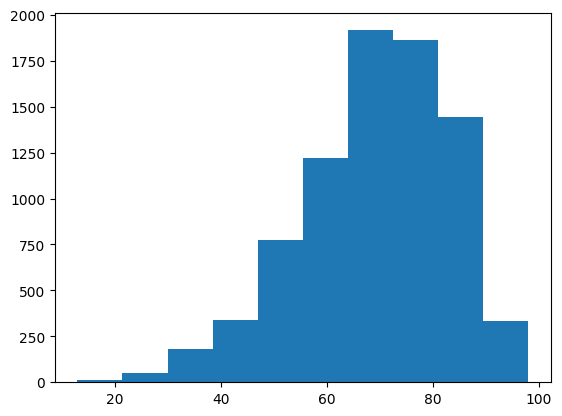

In [26]:
# Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
# para que al dibujar la gráfica de histograma no nos dé ningún problema.
critic_score = df_toclean['Critic_Score'].dropna()

# Usamos la gráfica de histograma para ver la distribución de los datos.
plt.hist(critic_score)
plt.show()

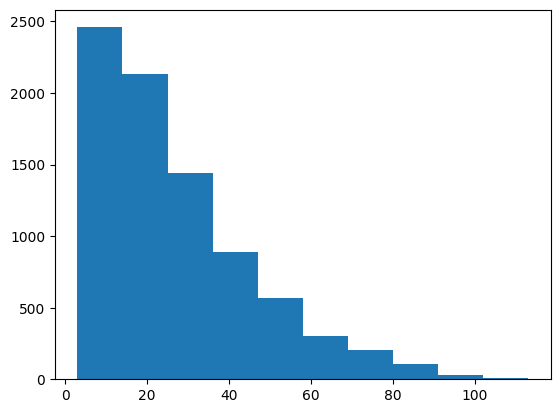

In [27]:
# Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
# para que al dibujar la gráfica de histograma no nos dé ningún problema.
critic_count = df_toclean['Critic_Count'].dropna()

# Usamos la gráfica de histograma para ver la distribución de los datos.
plt.hist(critic_count)
plt.show()

Estas gráficas nos indican que para las columnas *Critic_Score* y *Critic_Count* la distribución de sus datos no parece ser homogénea por lo que es conveniente utilizar la mediana como estrategia de imputación de sus valores nulos.

In [29]:
# Usamos el método median() para obtener la mediana de los valores de cada columna.
cs_median = critic_score.median()
cc_median = critic_count.median()

# Con el método fillna() reemplazamos los valores nulos de cada columna por la mediana.
df_toclean.fillna({ 'Critic_Score': cs_median }, inplace=True)
df_toclean.fillna({ 'Critic_Count': cc_median }, inplace=True)

# Verificamos el número total de valores nulos de cada columna del dataset.
df_toclean.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6702
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

Por el momento esto es lo único que podemos hacer con respecto a los valores nulos pues para resolver el caso de las demás columnas debemos atender antes otros problemas.

#### Error de tipos en la columna *User_Score*
Atendamos entonces el caso de la columna *User_Score* que contiene elementos string cuando esta columna debería ser de tipo númerico. Verifiquemos cuáles son los valores únicos que contiene esta columna.

In [30]:
# Usamos el método unique() para ver los valores únicos en la columna.
df_toclean['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Como se puede ver tenemos un valor que no representa ningún dato númerico, *tbd*. Para solventar esta situación vamos a transformar los valores de esta columna a tipo float usando el método *to_numeric()*, indicando que aquellos valores string que no se puedan parsear a un tipo númerico tomen el valor nulo.

In [31]:
# Usamos el método de pandas to_numeric() para transformar los datos de una columna a valores numéricos
# El parámetro errors='coerce' indica que los valores que no puedan ser parseado tomen el valor nulo.
df_toclean['User_Score'] = pd.to_numeric(df_toclean['User_Score'], errors='coerce')

# Usamos de nuevo info para verificar el cambio.
df_toclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


Efectivamente la columna *User_Score* ahora es de tipo float y como se puede ver el número de valores nulos ha aumentado con respecto a la última verificación hecha con el método *info()*, lo que indica que la transformación se ha hecho de manera correcta. Algo que podemos hacer en este punto es verificar, mediante un gráfico de cajas y bigotes, si para la columna *User_Score* existen datos atípicos.

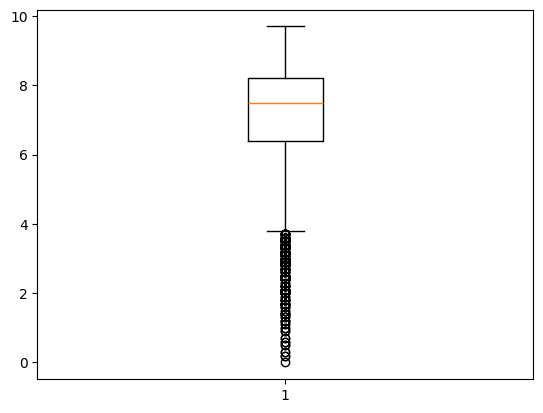

In [33]:
# Guardamos el avance de haber transformado el tipo de dato de la columna de manera correcta.
df_aux['User_Score'] = df_toclean['User_Score']

# Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
# para que al dibujar la gráfica de cajas y bigotes no nos dé ningún problema.
user_score = df_toclean['User_Score'].dropna()

# Dibujamos la gráfica de cajas y bigotes.
plt.boxplot([user_score])
plt.show()

En la gráfica podemos identificar algunos datos atípicos que no son muy relevantes pues no son outliers ya que se encuentran en cercanías al valor mínimo representado por el bigote inferior. Esto quiere decir que esta columna esta ya lista para reemplazar su valores nulos usando alguna estrategia de imputación.

#### Valores atípicos en la columna *User_Count*

Sabemos que en la columna *User_Count* hay una gran cantidad de outliers que debemos limpiar para no afectar en gran medida las estadísticas del dataset para futuros procesos sobre los datos. La estrategia que podemos seguir es calcular los outliers y reemplazarlos por valores nulos que luego limpiaremos.

Para calcular los outliers primero debemos calcular los cuartiles, el rango intercuartil y los valores de los bigotes (estos bigotes se refieren a la gráfica de cajas y bigotes) correspondientes a los datos de esta columna.

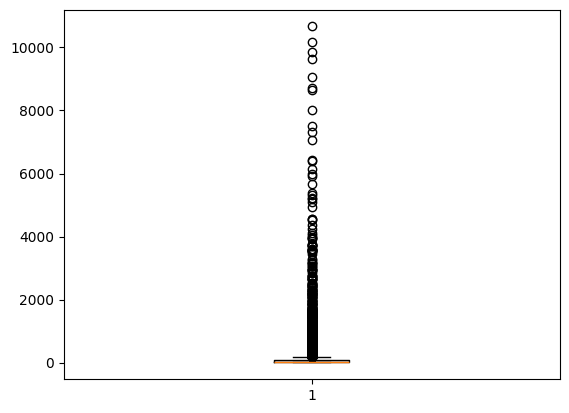

In [34]:
# Guardamos el avance de haber transformado el tipo de dato de la columna de manera correcta.
df_aux['User_Count'] = df_toclean['User_Count']

# Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
# para que al dibujar la gráfica de cajas y bigotes no nos dé ningún problema.
user_count = df_toclean['User_Count'].dropna()

# Dibujamos la gráfica de cajas y bigotes.
plt.boxplot([user_count])
plt.show()

In [36]:
# Usamos el método quantile() para obtener los cuartiles 1 (25%) y 3 (75%)
uc_q1 = df_toclean['User_Count'].quantile(0.25)
uc_q3 = df_toclean['User_Count'].quantile(0.75)

print(uc_q1)
print(uc_q3)

# Calculamos el rango intercuartil
uc_iqr = uc_q3 - uc_q1

# Calculamos el valor de los bigotes inferior y superior
uc_lw = uc_q1 - (1.5 * uc_iqr)
uc_uw = uc_q3 + (1.5 * uc_iqr)

# Verificamos los resultados
print('Primer cuartil: ', uc_q1)
print('Tercer cuartil: ', uc_q3)
print('Rango intercuartil: ', uc_iqr)
print('Bigote inferior: ', uc_lw)
print('Bigote superior: ', uc_uw)

10.0
81.0
Primer cuartil:  10.0
Tercer cuartil:  81.0
Rango intercuartil:  71.0
Bigote inferior:  -96.5
Bigote superior:  187.5


Teniendo los valores de los bigotes, podemos detectar los outliers. Estos outliers se pueden definir como todos aquellos valores que se encuentran por fuera del rango comprendido entre los bigotes inferior y superior. Todos estos valores los vamos a volver nulos para tratar de normalizar los datos.

In [37]:
# Armamos una condición lógica y la guardamos en una variable.
uc_outliers = (df_toclean['User_Count'] < uc_lw) | (df_toclean['User_Count'] > uc_uw)

# Usamos el atributo loc para acceder a todos los registros que cumplan la condición especificada y reemplazamos todos los
# valores de dichos registros para la columna elegida con el valor nulo.
df_toclean.loc[uc_outliers, 'User_Count'] = np.nan

# Guardamos el avance del manejo de outliers para la columna.
df_aux['User_Count'] = df_toclean['User_Count']

# Volvemos a usar los métodos isna() y sum() para verificar los valores nulos de cada columna.
df_toclean.isna().sum()

Name                   0
Platform               0
Year_of_Release      269
Genre                  0
Publisher             54
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score           0
Critic_Count           0
User_Score          9127
User_Count         10207
Developer           6621
Rating              6767
dtype: int64

Como podemos observar el número de valores nulos de la columna *User_Count* aumentó en casi mil unidades, por lo que la tranformación que hicimos surtió efecto. Con esto tenemos la columna lista para reemplazar todos sus valores nulos.

#### Reemplazar el valor no vigente de la columna *Rating*

Para el caso de la columna *Rating* debemos cambiar el valor no vigente *K-A* por su reemplazo *E*.

In [38]:
# Usamos el método replace() de pandas para cambiar los valores de una columna.
df_toclean = df_toclean.replace({ 'Rating': { 'K-A': 'E' }})

# Guardar el avance del cambio del valor no vigente de la columna.
df_aux['Rating'] = df_toclean['Rating']

# Usamos de nuevo el método unique() para verificar el cambio.
df_toclean['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

¡En este punto ya tenemos todas las columnas listas para solucionar el problema de los valores nulos!

#### Volviendo a los nulos

Retomando el problema de los valores nulos, recordemos las columnas que nos hacen falta por limpiar:
1. La columna *User_Score*.
2. La columna *User_Count*.
3. La columna *Rating*.
4. La columna *Developer*.
5. La columna *Year_of_Release*.
6. La columna *Publisher*.

Comencemos por la columna *User_Score*. Para saber que estrategía de imputación vamos a utilizar veamos la distribución de sus datos.

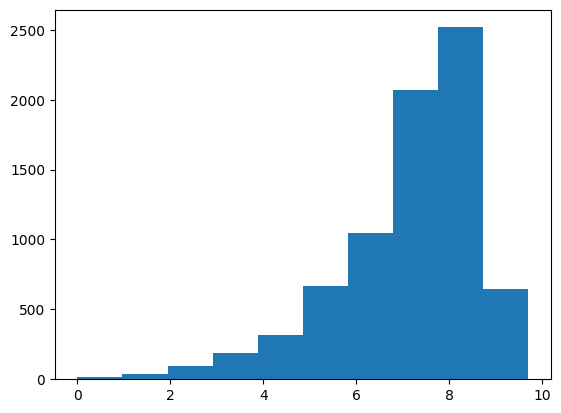

In [61]:
# Usamos la variable user_score para dibujar la gráfica de histograma.
plt.hist(user_score)
plt.show()

Este histograma nos muestra una forma de campana desviada hacia la derecha, por lo que la mejor estrategia de imputación para esta columna es reemplazar los valores nulos por la mediana.

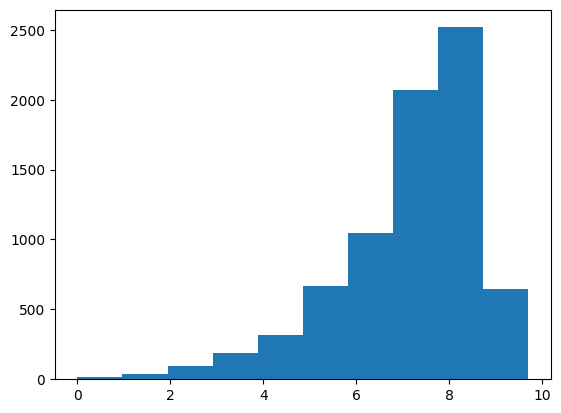

In [40]:
# Usamos el método median() para obtener el valor de la mediana y lo guardamos en una variable.
us_median = user_score.median()

# Con el método fillna() reemplazamos los valores nulos de una columna por un nuevo valor.
df_toclean.fillna(value={'User_Score': us_median }, inplace=True)

# Verificamos nuevamente el número de nulos.
df_toclean.isna().sum()

plt.hist(user_score)
plt.show()

Prosigamos con la columna *User_Count*. Verifiquemos también la distribución de sus datos.

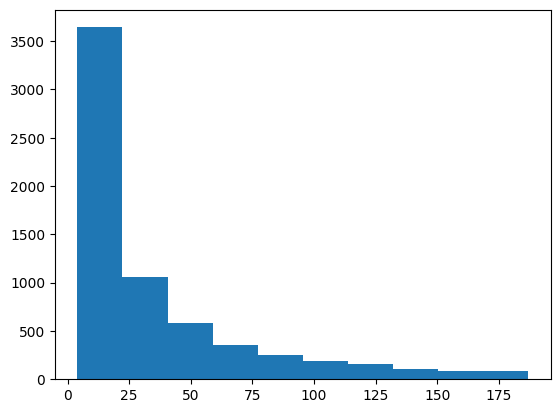

In [41]:
# Obtenemos la columna, la guardamos en una variable y con el método dropna() quitamos los valores nulos
# para que al dibujar la gráfica de histograma no nos dé ningún problema.
user_count = df_toclean['User_Count'].dropna()

# Usamos la gráfica de histograma para ver la distribución de los datos.
plt.hist(user_count)
plt.show()

La gráfica nos está indicando que la distribución de los datos para la columna *User_Count* no es homogénea por lo que aquí también es conveniente imputar los datos usando la mediana de los valores de esta columna.

In [44]:
# Usamos el método median() para obtener el valor de la mediana y lo guardamos en una variable.
uc_median = user_count.median()

# Con el método fillna() reemplazamos los valores nulos de una columna por un nuevo valor.
df_toclean.fillna({ 'User_Count': uc_median }, inplace=True)

# Verificamos nuevamente el número de nulos.
df_toclean.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating             6767
dtype: int64

Para la columna *Rating* lo que podemos hacer es utilizar la moda para reemplazar los valores nulos. En este caso sabemos que el valor que más se repite es el rating *E*, por lo que reemplazamos los nulos por este valor.

In [45]:
# Usamos método fillna() para reemplazar los valores nulos de una columna por un nuevo valor.
df_toclean.fillna(value={ 'Rating': 'E' }, inplace=True)

# Guardamos el avance de la imputación de los valores nulos de la columna categórica.
df_aux['Rating'] = df_toclean['Rating']

# Verificamos nuevamente el número de nulos.
df_toclean.isna().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer          6621
Rating                0
dtype: int64

En este punto ya solo nos quedan tres columnas con valores nulos. Veamos primero el caso de la columna *Developer*. Como habíamos identificado anteriormente, esta columna es de tipo categórico por lo que, siguiendo las recomendaciones de imputación, podríamos reemplazar sus valores nulos con la moda. Pero aquí surge un inconveniente: si reemplazamos con la moda nos pueden quedar desarrolladores equivocados para muchos de los videojuegos de la lista (E.g. Nintendo como desarrollador Call of Duty). Aquí lo que podemos hacer es reemplazar los valores nulos por el valor correspondiente al editor para cada registro. Esto porque es bastante común que la empresa que publica el videojuego también sea la misma que lo desarrolla (E.g. aveces se pueden ver a Activision como el desarrollador de Call of Duty).

In [46]:
# Sabemos que el total de registros del dataset es de 16717 por lo que vamos a recorrer esa cantidad.
for i in range(16717):
    developer = df_toclean['Developer'][i]
    publisher = df_toclean['Publisher'][i]

    # Aquí vamos a verificar que el valor de Developer para esa posición sea nulo y que el valor de Publisher para esa misma
    # posición sea diferente de nulo. Si estas dos condiciones se cumplen hacemos el reemplazo.
    if pd.isna(developer) and not pd.isna(publisher):
        df_toclean.loc[i, 'Developer'] = publisher

# Guardamos el avance de la imputación de los valores nulos de la columna categórica.
df_aux['Developer'] = df_toclean['Developer']

df_toclean.isna().sum()

Name                 0
Platform             0
Year_of_Release    269
Genre                0
Publisher           54
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer           45
Rating               0
dtype: int64

Con esta estrategia hemos podido eliminar una gran cantidad de valores nulos de la columna *Developer*. Ya en este punto no tenemos una estrategia clara para eliminar los nulos faltantes de dicha columna. Veamos las dos columnas restantes:
- Si analizamos la columna *Publisher* aquí tampoco podemos aplicar la moda por la misma razón que no pudimos hacerlo para la columna *Developer*. Por otro lado, la estrategia usada para para eliminar los valores nulos de *Developer* no nos serviría de mucho pues no es muy común que la empresa desarrolladora sea catalogada también como la editora (E.g. Treyarch).
- La columna *Year_of_Release*, a pesar de ser una columna numérica, en realidad sus valores son categóricos, por lo que habría que usar la moda para reemplazar los valores nulos. De nuevo esta estrategia no sería muy buena pues muchos videojuegos quedarían con un año equivocado de publicación.

En ese sentido podemos optar por dos caminos:
1. Eliminar los registros que tienen estos valores nulos.
2. Reemplazar esos valores nulos por otro valor que indique que es desconocido (esto se puede ver en varias columnas categóricas del dataset como *Publisher* o *Developer*).

Veamos que porcentaje del dataset representan estos últimos registros con valores nulos.

In [47]:
# Calculamos el total de celdas que posee el dataset (filas x columnas).
total_cells = np.product(df_toclean.shape)

# Calculamos el total de celdas que tienen valores nulos.
missing = df_toclean.isna().sum() # Celdas con valores nulos por columna.
total_missing = missing.sum()

# Finalmente calculamos el porcentaje.
missing_percent = (total_missing / total_cells) * 100

print('Porcentaje de valores nulos en todo el dataset: ', missing_percent)

AttributeError: module 'numpy' has no attribute 'product'

Tenemos que el porcentaje de valores nulos restantes es de 14% en comparación con todos los datos del dataset. Aunque este porcentaje es aceptable para tomar la decisión de borrar los datos, debemos tener en cuenta que tenemos muchas más columnas con valores para estos registros que nos pueden brindar información valiosa.

Para el caso de este ejercicio vamos a optar por el segundo camino. Lo que haremos será reemplazar los valores nulos de la columna *Year_of_Release* por un valor de 9999.00 y los valores nulos de las columnas *Publisher* y *Developer* por el valor 'Unknown' (valor que se maneja en estas columnas).

In [48]:
# Usamos el método fillna() para reemplazar los valores nulos de las colmnas restantes.
df_toclean.fillna({ 'Year_of_Release': 9999.00 }, inplace=True)
df_toclean.fillna({ 'Publisher': 'Unknown' }, inplace=True)
df_toclean.fillna({ 'Developer': 'Unknown' }, inplace=True)

# Guardamos los avances referentes a las imputaciones finales de valores nulos en las columnas categóricas.
df_aux['Year_of_Release'] = df_toclean['Year_of_Release']
df_aux['Publisher'] = df_toclean['Developer']
df_aux['Developer'] = df_toclean['Developer']

# Verificamos el número total de valores nulos.
df_toclean.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Como podemos ver, hemos eliminado por completo los valores nulos y hemos logrado solucionar los errores que habíamos detectado. Veamos ahora información estadística de nuestras columnas numéricas ya procesadas.

In [51]:
# Usamos el método describe() para ver información estadística de las columnas del dataset final.
df_toclean.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16717.0,2135.099719,1005.721828,1980.00,2003.00,2008.00,2011.00,9999.00
NA_Sales,16717.0,0.263255,0.813475,0.00,0.00,0.08,0.24,41.36
EU_Sales,16717.0,0.145010,0.503303,0.00,0.00,0.02,0.11,28.96
JP_Sales,16717.0,0.077610,0.308836,0.00,0.00,0.00,0.04,10.22
Other_Sales,16717.0,0.047333,0.186721,0.00,0.00,0.01,0.03,10.57
Global_Sales,16717.0,0.533462,1.547956,0.01,0.06,0.17,0.47,82.53
Critic_Score,16717.0,70.010767,9.776915,13.00,71.00,71.00,71.00,98.00
Critic_Count,16717.0,23.609380,13.510184,3.00,21.00,21.00,21.00,113.00
User_Score,16717.0,7.329760,1.027790,0.00,7.50,7.50,7.50,9.70
User_Count,16717.0,25.255668,25.534801,4.00,19.00,19.00,19.00,187.00


#### Ups! parece que algo no anda del todo bien...

Las columnas *Critic_Score*, *Critic_Count*, *User_Score* y *User_Count* parecieran tener un comportamiento extraño pues sus tres cuartiles tienen el mismo valor. Además *Critic_Count* y *User_Count* parecieran tener aún valores atípicos. Veamos por ejemplo estas columnas en una gráfica de cajas y bigotes.

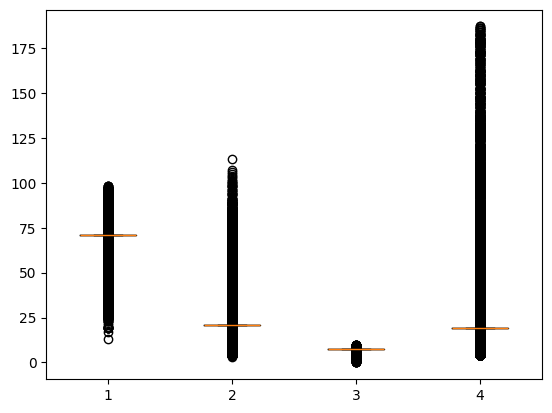

In [50]:
# Visualizamos las columnas usando una gráfica de cajas y bigotes.
plt.boxplot([df_toclean['Critic_Score'], df_toclean['Critic_Count'], df_toclean['User_Score'], df_toclean['User_Count']])
plt.show()

Con esta gráfica confirmamos que estas columnas tienen un comportamiento extraño: todos los cuartiles tienen el mismo valor de la mediana. Recordando lo que hicimos al reemplazar los valores nulos esto tiene sentido pues hicimos una imputación usando la mediana en mas de 8K valores, esto es, más de la mitad de los registros totales para cada una de las columnas. Este comportamiento está causando que se presenten muchos valores atípicos.

Lo que acabamos de ver quiere decir que pasamos algo por alto y estas cuatro columnas son suceptibles a mejoras.

### ¿Cómo podemos mejorar el análisis y limpieza realizados?

Para mejorar el análisis y limpieza que ya hicimos sobre las cuatro columnas podemos tener en cuenta los siguiente:
1. Para hacer la imputación usando la mediana lo que hicimos fue ver si todos los datos de la columna tenían una distribución normal y después calculamos la mediana de toda la columna. Esto es lo que se conoce como un análisis univariado (lo que no está mal). Para mejorar esto se pueden hacer dos cosas:
   - Lo primero es utilizar un método estadístico para asegurarnos del tipo de distribución que tienen los datos de la columna. Esto porque muchas veces no se puede asegurar si la distribución es homogénea o heterogénea usando únicamente una gráfica. Se puede usar **Kolmogorov-Smirnov** para una muestra mayor a 50.
   - La segunda alternativa es pasar a un análisis bivariado. Esto significa, tratar de encontrar una relación entre la columna a la que se quiere hacer imputación y otra columna del dataset. Con esta relación verificar su distribución y decidir que estrategia usar. E.g. Ver la distribución de User_Count para un género específico del videojuego e imputar solo los registros que pertenezcan a dicho género.
2. Usar un algoritmo de interpolación para imputar los valores nulos.
3. Crear un módelo para calcular qué valor deberían tener los valores nulos e imputarlos. Esto requiere ayuda de algoritmos de Machine Learning.
4. En referencia a los valores atípicos se podría ser un poco más riguroso, ejecutando el código de eliminación de dichos valores las veces que sea necesario hasta que no haya ningún valor atípico. **Ojo**: esto puede causar pérdida de información.

En este ejemplo vamos a optar por la opción 1.b: trataremos de hacer análisis bivariado. ¿Recuerdan el dataframe *df_aux*? Es momento de usarlo. Este dataframe tiene guardados algunos cambios que nos pueden servir para no repetir el proceso completo. Recordemos dichos cambios:
- Todas las columnas de tipo categórico ya están correctamente imputadas, es decir, sus valores nulos ya se reemplazaron de forma correcta.
- La columna *User_Count* ya no tiene los outliers que habíamos detectado al principio.

In [52]:
# Verificamos en que estado está el dataframe df_aux en cuanto a sus valores nulos.
df_aux.isna().sum()

Name                   0
Platform               0
Year_of_Release        0
Genre                  0
Publisher              0
NA_Sales               0
EU_Sales               0
JP_Sales               0
Other_Sales            0
Global_Sales           0
Critic_Score        8580
Critic_Count        8580
User_Score          9127
User_Count         10207
Developer              0
Rating                 0
dtype: int64

In [53]:
# Vericamos las estadísticas de las columnas numéricas del dataframe df_aux.
df_aux.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16717.0,2135.099719,1005.721828,1980.00,2003.00,2008.00,2011.00,9999.00
NA_Sales,16717.0,0.263255,0.813475,0.00,0.00,0.08,0.24,41.36
EU_Sales,16717.0,0.145010,0.503303,0.00,0.00,0.02,0.11,28.96
JP_Sales,16717.0,0.077610,0.308836,0.00,0.00,0.00,0.04,10.22
Other_Sales,16717.0,0.047333,0.186721,0.00,0.00,0.01,0.03,10.57
Global_Sales,16717.0,0.533462,1.547956,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Score,7590.0,7.125046,1.500006,0.00,6.40,7.50,8.20,9.70
User_Count,6510.0,35.063902,38.947517,4.00,9.00,19.00,45.00,187.00


Una vez que confirmamos que el dataframe *df_aux* tiene los cambios esperados, procedemos a utilizarlo para mejor la limpieza de los datos.

In [54]:
# Creamos una copia basada en df_aux con la que vamos a realizar las mejoras.
df_fix = df_aux.copy()

Comencemos analizando qué columnas pueden estar relacionadas con las columnas que vamos a mejorar en especial las de puntaje (recordemos que las de conteo están muy relacionadas al puntaje). Es muy probable que el puntaje que se le da a un videojuego esté relacionado con valores categóricos como: a) la plataforma en la que funciona el juego (un juego puede funcionar bien en determinadas plataformas y en otras puede que no), b) el género del juego y c) la casa desarrolladora del juego (fama de la casa desarroladora. E.g. hay casas desarroladoras que tienen fama de implementar juegos con muchos bugs); y con valores numéricos como el número de ventas (pueden ser las globales). La relación que existe entre valores numéricos se puede verificar usando tablas de **correlación**. Creemos un dataframe con las columnas nombradas y las columnas a mejorar.

In [55]:
# Creamos un nuevo dataframe con las columnas que se quieren analizar.
selected_columns = df_fix[[
    'Platform',
    'Genre',
    'Global_Sales',
    'Critic_Score',
    'Critic_Count',
    'User_Score',
    'User_Count',
    'Developer'
]]
selected_columns.head(50) # Imprimimos los primeros cincuenta registros.

,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,Sports,82.53,76.0,51.0,8.0,NaN,Nintendo
1,NES,Platform,40.24,NaN,NaN,NaN,NaN,Nintendo
2,Wii,Racing,35.52,82.0,73.0,8.3,NaN,Nintendo
3,Wii,Sports,32.77,80.0,73.0,8.0,NaN,Nintendo
4,GB,Role-Playing,31.37,NaN,NaN,NaN,NaN,Nintendo
5,GB,Puzzle,30.26,NaN,NaN,NaN,NaN,Nintendo
6,DS,Platform,29.80,89.0,65.0,8.5,NaN,Nintendo
7,Wii,Misc,28.92,58.0,41.0,6.6,129.0,Nintendo
8,Wii,Platform,28.32,87.0,80.0,8.4,NaN,Nintendo
9,NES,Shooter,28.31,NaN,NaN,NaN,NaN,Nintendo


Viendo estos primeros cincuenta elementos podemos vislumbrar cierta relación entre los puntajes, el género y, en menor medida, la casa desarrolladora. Podemos descartar una relación entre los puntajes y la plataforma pues para la misma plataforma hay puntajes muy distintos. Por otro lado los puntajes de la crítica y los puntajes de los usuarios parace estar muy parejo entre sí, y ninguno de los dos pareciera relacionarse con el número de ventas. Confirmemos esto último con una tabla de correlación.

In [56]:
# Construimos un dataframe con las columnas numéricas que deseamos correlacionar
numeric_columns = selected_columns[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]
numeric_columns.corr()

,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Global_Sales,1.000000,0.245471,0.303571,0.088139,0.259132
Critic_Score,0.245471,1.000000,0.425504,0.580878,0.299106
Critic_Count,0.303571,0.425504,1.000000,0.194133,0.487344
User_Score,0.088139,0.580878,0.194133,1.000000,0.117115
User_Count,0.259132,0.299106,0.487344,0.117115,1.000000


Esta tabla de correlación nos está mostrando una relación muy pequeña entre los datos de las columnas a mejorar y la columna *Global_Sales*. Después de este análisis pareciera que lo mejor es tratar de obtener la distribución de datos de cada columna *Critic_Score*, *Critic_Count*, *User_Score* y *User_Count* por cada género de videojuego. Comencemos por tener un conjunto de los valores de género disponibles.

In [57]:
# Usamos el método unique() para obtener los valores únicos de la columna.
genres = selected_columns['Genre'].unique()
genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Realicemos ahora una prueba con uno de los géneros para ver las distribuciones de, por ejemplo, la columna *Critic_Score*.

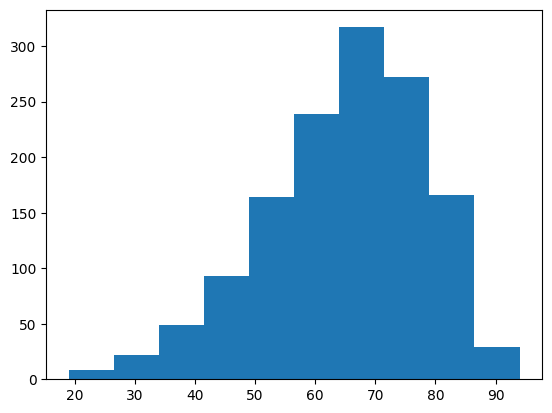

In [58]:
# Elegimos los datos de la columna deseada filtrándolos por el género.
genre_records = selected_columns.loc[selected_columns['Genre'] == 'Action'].dropna()

# Verificamos la distribución por medio de una gráfica de histograma.
plt.hist(genre_records['Critic_Score'])
plt.show()

Esta prueba pareciera dar una forma de campana mucho más definida, pero al estar un poco desviada seguimos optando por la mediana. Si hacemos pruebas cambiando tanto los géneros como las columnas los resultados van a ser muy parecidos. En ese sentido podemos probar por calcular la mediana de cada columna por género y tratar de imputar los valores nulos de cada columna con la mediana, también por género. Esto se debe hacer sobre el dataframe *df_fix*.

In [59]:
for i in range(len(genres)):
    genre = genres[i]
    g_condition = df_fix['Genre'] == genre

    # Obtenemos los registros pertenecientes a un género.
    genre_dataset = df_fix.loc[g_condition]

    # Calcular la mediana de cada columna para el género seleccionado.
    gcs_median = genre_dataset['Critic_Score'].median()
    gcc_median = genre_dataset['Critic_Count'].median()
    gus_median = genre_dataset['User_Score'].median()
    guc_median = genre_dataset['User_Count'].median()

    # Imputar los valores nulos de cada columna para el género seleccionado.
    df_fix.loc[g_condition, 'Critic_Score'] = df_fix['Critic_Score'].fillna(gcs_median)
    df_fix.loc[g_condition, 'Critic_Count'] = df_fix['Critic_Count'].fillna(gcc_median)
    df_fix.loc[g_condition, 'User_Score'] = df_fix['User_Score'].fillna(gus_median)
    df_fix.loc[g_condition, 'User_Count'] = df_fix['User_Count'].fillna(guc_median)

df_fix.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

Hemos conseguido nuevamente reemplazar todos los valores nulos del dataset. Veamos ahora los datos estadísticos de las columnas numéricas.

In [60]:
# Usamos el método describe para obtener datos estadísticos de las columnas numéricas del dataframe.
df_fix.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16717.0,2135.099719,1005.721828,1980.00,2003.00,2008.00,2011.00,9999.00
NA_Sales,16717.0,0.263255,0.813475,0.00,0.00,0.08,0.24,41.36
EU_Sales,16717.0,0.145010,0.503303,0.00,0.00,0.02,0.11,28.96
JP_Sales,16717.0,0.077610,0.308836,0.00,0.00,0.00,0.04,10.22
Other_Sales,16717.0,0.047333,0.186721,0.00,0.00,0.01,0.03,10.57
Global_Sales,16717.0,0.533462,1.547956,0.01,0.06,0.17,0.47,82.53
Critic_Score,16717.0,69.675600,9.967931,13.00,67.00,70.00,75.00,98.00
Critic_Count,16717.0,23.319106,14.011490,3.00,17.00,18.00,28.00,113.00
User_Score,16717.0,7.310163,1.035452,0.00,7.10,7.40,7.80,9.70
User_Count,16717.0,25.142609,26.007120,4.00,13.00,18.00,26.00,187.00


Estos resultados parecen tener un poco más sentido. Visualicemos las columnas mejoradas en gráficas de caja y bigotes.

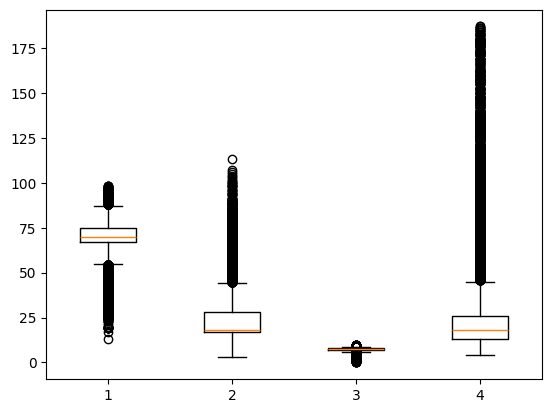

In [61]:
# Visualizamos las columnas usando una gráfica de cajas y bigotes.
plt.boxplot([df_fix['Critic_Score'], df_fix['Critic_Count'], df_fix['User_Score'], df_fix['User_Count']])
plt.show()

Podemos observar una mejora con respecto a la gráfica anterior donde prácticamente no existían cajas ni bigotes. Aun así seguimos viendo valores atípicos. Esto ocurre porque en realidad no hicimos manejo de los valores atípicos que habíamos detectado con la gráfica anterior. Lo que hicimos fue ajustar los datos, en especial los valores nulos, para poder ver con más claridad el rango de distribución de los datos. Si analizamos de manera detallada, los valores atípicos que vemos aquí son prácticamente los mismos que vimos anteriormente. Esto es algo bueno, pues significa que al hacer la imputación de los datos no generamos valores atípicos nuevos (Esto también se puede observar en la tabla de estadísticas de las columnas numéricas). En este punto el dataset está prácticamente limpio.

**Nota**: al comparar con el dataset original, sí se generaron algunos valores atípicos pequeños, lo que es normal al momento de realizar imputación de datos. A pesar de esto hubo mejoras también con respecto dicho dataset (ver el caso de la columna *User_Count*).

### Ajustes finales

Todas las columnas de tipo númerico son específicmente del tipo float, pero si analizamos no todas tienen que ser de dicho tipo. Algunas columnas como *Critic_Count* y *User_Count* que representan conteos podrían ser del tipo entero, que ocupa menos espacio en memoria y disco duro del dispositivo. Por otro lado la columna *Year_of_Release* debería ser de tipo categórico, por lo que la podríamos tranformar a tipo object (string o texto). Pero antes podríamos pasarla al tipo entero también para remover los decimales de los años. Hagamos todas estas transformaciones.

In [62]:
# Aplicamos el cambio usando el método apply() y en el caso en el que se debe transformar de float a int utilizamos el tipo
# int64 perteneciente a numpy.
df_fix['Critic_Count'] = df_fix['Critic_Count'].apply(np.int64)
df_fix['User_Count'] = df_fix['User_Count'].apply(np.int64)
df_fix['Year_of_Release'] = df_fix['Year_of_Release'].apply(np.int64)

# Aplicamos el método apply() junto al tipo de dato str para pasar la columna de float a string.
df_fix['Year_of_Release'] = df_fix['Year_of_Release'].apply(str)

# Verificamos los tipos de las columnas.
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16717 non-null  object 
 3   Genre            16717 non-null  object 
 4   Publisher        16717 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     16717 non-null  float64
 11  Critic_Count     16717 non-null  int64  
 12  User_Score       16717 non-null  float64
 13  User_Count       16717 non-null  int64  
 14  Developer        16717 non-null  object 
 15  Rating           16717 non-null  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 2.0+ MB


### Exportar dataset

Por último, cuando ya terminemos el proceso de análisis y limpieza sobre el dataset podemos proceder a exportarlo para usarlo en futuros proyectos de análisis de datos, visualización de datos o Machine Learning.

In [63]:
# Usamos el método to_csv() para exportar el dataset.
df_fix.to_csv('videogame_sales_with_ratings_cleaned.csv', index=False)